# 키워드 '직장인' 으로 검색한 네이버 쇼핑몰 데이터 분석하기

In [19]:
import requests
import pandas as pd

class NaverShoppingAPI:
    def __init__(self, client_id, client_secret):
        """
        네이버 쇼핑 API를 초기화합니다.
        """
        self.client_id = client_id
        self.client_secret = client_secret
        self.base_url = 'https://openapi.naver.com/v1/search/shop.json'

    def fetch_data(self, query, display=100, start=1):
        """
        API로부터 데이터를 가져옵니다.
        :param query: 검색어
        :param display: 가져올 결과 수 (최대 100)
        :param start: 시작 위치 (1 ~ 1000)
        :return: API 응답 데이터
        """
        headers = {
            'X-Naver-Client-Id': self.client_id,
            'X-Naver-Client-Secret': self.client_secret
        }
        params = {
            "query": query,
            "display": display,
            "start": start
        }
        
        response = requests.get(self.base_url, headers=headers, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            response.raise_for_status()

    def fetch_all_data(self, query, total=1000, display=100):
        """
        API를 반복 호출하여 최대 total 개의 데이터를 가져옵니다.
        :param query: 검색어
        :param total: 가져올 총 데이터 수 (최대 1000)
        :param display: 한 번에 가져올 데이터 수 (최대 100)
        :return: 전체 데이터를 포함한 리스트
        """
        all_items = []
        for start in range(1, total + 1, display):
            api_result = self.fetch_data(query=query, display=display, start=start)
            if 'items' in api_result:
                all_items.extend(api_result['items'])
            else:
                break
        return all_items

    def to_dataframe(self, items):
        """
        데이터를 DataFrame으로 변환합니다.
        :param items: API에서 반환된 데이터 리스트
        :return: pandas DataFrame
        """
        return pd.DataFrame(items)

    def append_to_dataframe(self, existing_df, items):
        """
        기존 DataFrame에 데이터를 추가합니다.
        :param existing_df: 기존 pandas DataFrame
        :param items: 추가할 데이터 리스트
        :return: 기존 DataFrame에 추가된 DataFrame
        """
        new_df = self.to_dataframe(items)
        return pd.concat([existing_df, new_df], ignore_index=True)

# 사용 예시
if __name__ == "__main__":
    client_id = 'UGWFRw8nJK3z1B_irpX9'
    client_secret = 'tGq_GW6jBz'
    query = '직장인'

    # API 객체 생성
    naver_api = NaverShoppingAPI(client_id, client_secret)

    # 기존 DataFrame 초기화
    df = pd.DataFrame()

    # 최대 1000개의 데이터 가져오기
    all_items = naver_api.fetch_all_data(query=query, total=1000, display=100)

    # 데이터 추가
    df = naver_api.append_to_dataframe(df, all_items)

    # 결과 출력
    print(df.head(10))
    print(f"총 데이터 수: {len(df)}")


                                               title  \
0               바오니 가열 보온 도시락 <b>직장인</b> 밀프랩 스텐 도시락통   
1  다소다 도시락통 <b>직장인</b> 스텐도시락 샐러드 전자레인지 보온용기 소풍 수능...   
2  락앤락 스텐 보온 도시락통 세트 7P 수능 도시락 수험생 보온보냉 죽통 <b>직장인...   
3  다소다 베어 스텐 도시락통 어린이 유치원 소풍 초등 <b>직장인</b> 밀프랩 용기...   
4  락앤락 도시락통 <b>직장인</b> 도시락 세트 소풍 초등학생 2단 가방 젓가락 데...   
5                룩스라이프 보온도시락 스텐 <b>직장인</b> 도시락통 ver2   
6  [즉시20%][써모스]국민 보온도시락 죽통 푸드자 모음전 / 학생 대용량 <b>직장...   
7     다소다 밤부 도시락통 <b>직장인</b> 전자레인지 런치박스 소풍도시락 1200ml   
8  Bear <b>직장인</b> 보온도시락 가열 스팀 스텐 밀프랩 런치박스 밀프렙 도시락 통   
9                        스타벅스 도시락가방<b>직장인</b> 보온보냉 백   

                                                link  \
0  https://smartstore.naver.com/main/products/775...   
1  https://smartstore.naver.com/main/products/604...   
2  https://smartstore.naver.com/main/products/522...   
3  https://smartstore.naver.com/main/products/923...   
4  https://smartstore.naver.com/main/products/451...   
5  https://smartstore.naver.com/main/products/8

In [20]:
 len(df)

1000

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1000 non-null   object
 1   link         1000 non-null   object
 2   image        1000 non-null   object
 3   lprice       1000 non-null   object
 4   hprice       1000 non-null   object
 5   mallName     1000 non-null   object
 6   productId    1000 non-null   object
 7   productType  1000 non-null   object
 8   brand        1000 non-null   object
 9   maker        1000 non-null   object
 10  category1    1000 non-null   object
 11  category2    1000 non-null   object
 12  category3    1000 non-null   object
 13  category4    1000 non-null   object
dtypes: object(14)
memory usage: 109.5+ KB


In [22]:
df.to_csv(f'c:/data/naver_shopping{query}.csv',index=False, encoding='utf-8')

#############################
### gpt에게 다음과 같이 프롬프트 명령어
## 네이버 쇼핑몰 '직장인' 으로 분석한 자료임. 
## 파생변수, 결합변수, 전처리등을 거쳐서 데이터 분석 보고서, 인사이트 작성
## 최대한 분석 가능한 차트 작성


In [ ]:
################
## 분석
import pandas as  pd
pd.read_csv('c:/data/naver_shopping직장인.csv')
df.info()

- 위의 info결과물을 이용하여서 작업계획서를 작성하여 봄
-
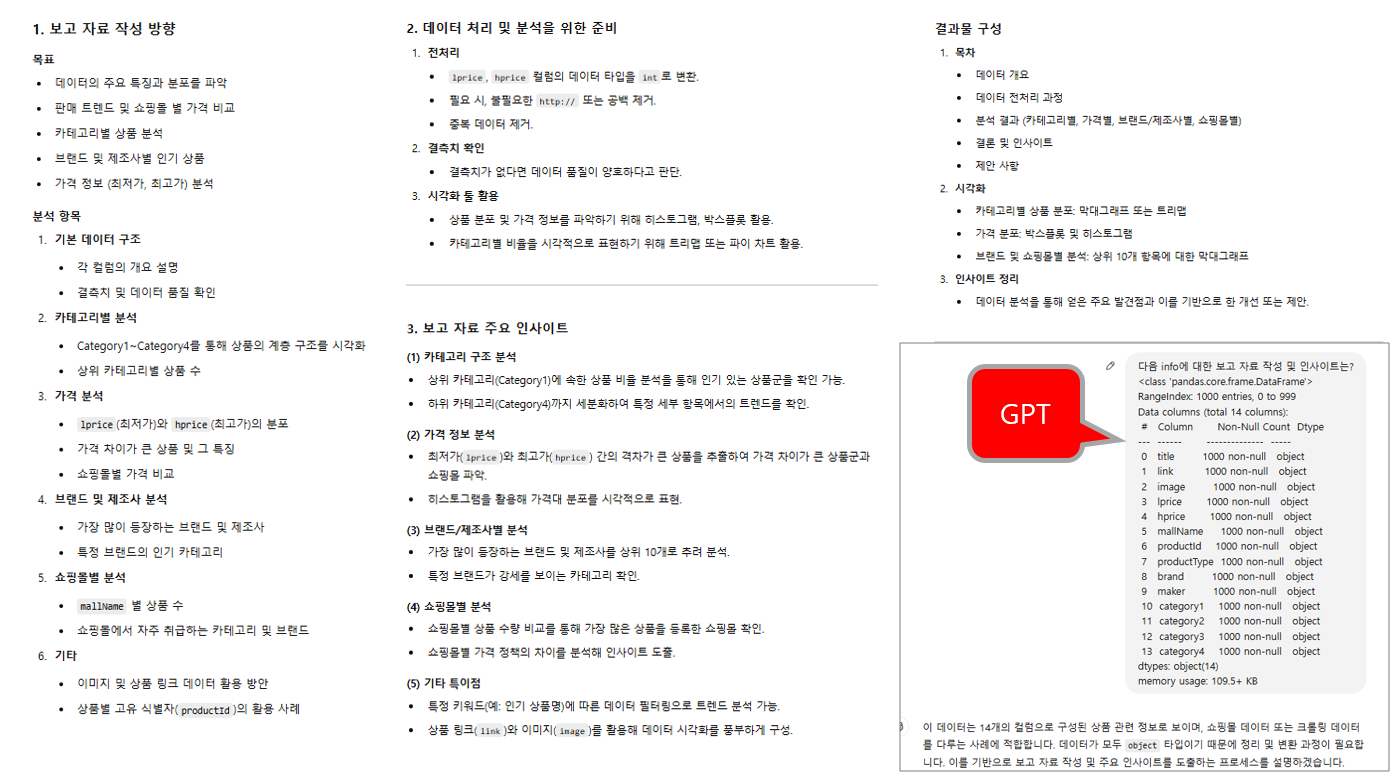

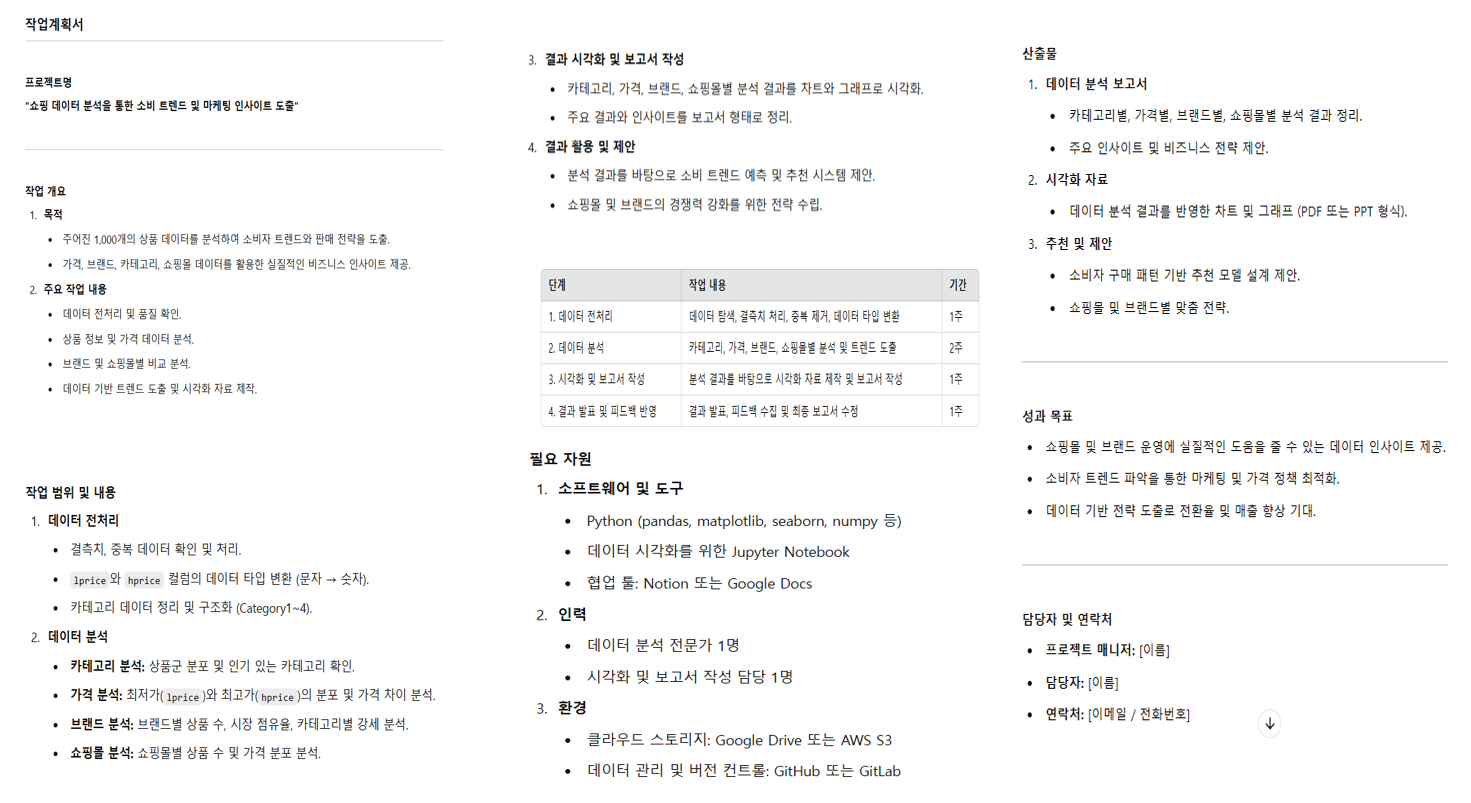

In [ ]:
data_info = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Missing Values": df.isnull().sum().to_dict(),
    "Sample Data": df.head()
}
data_info

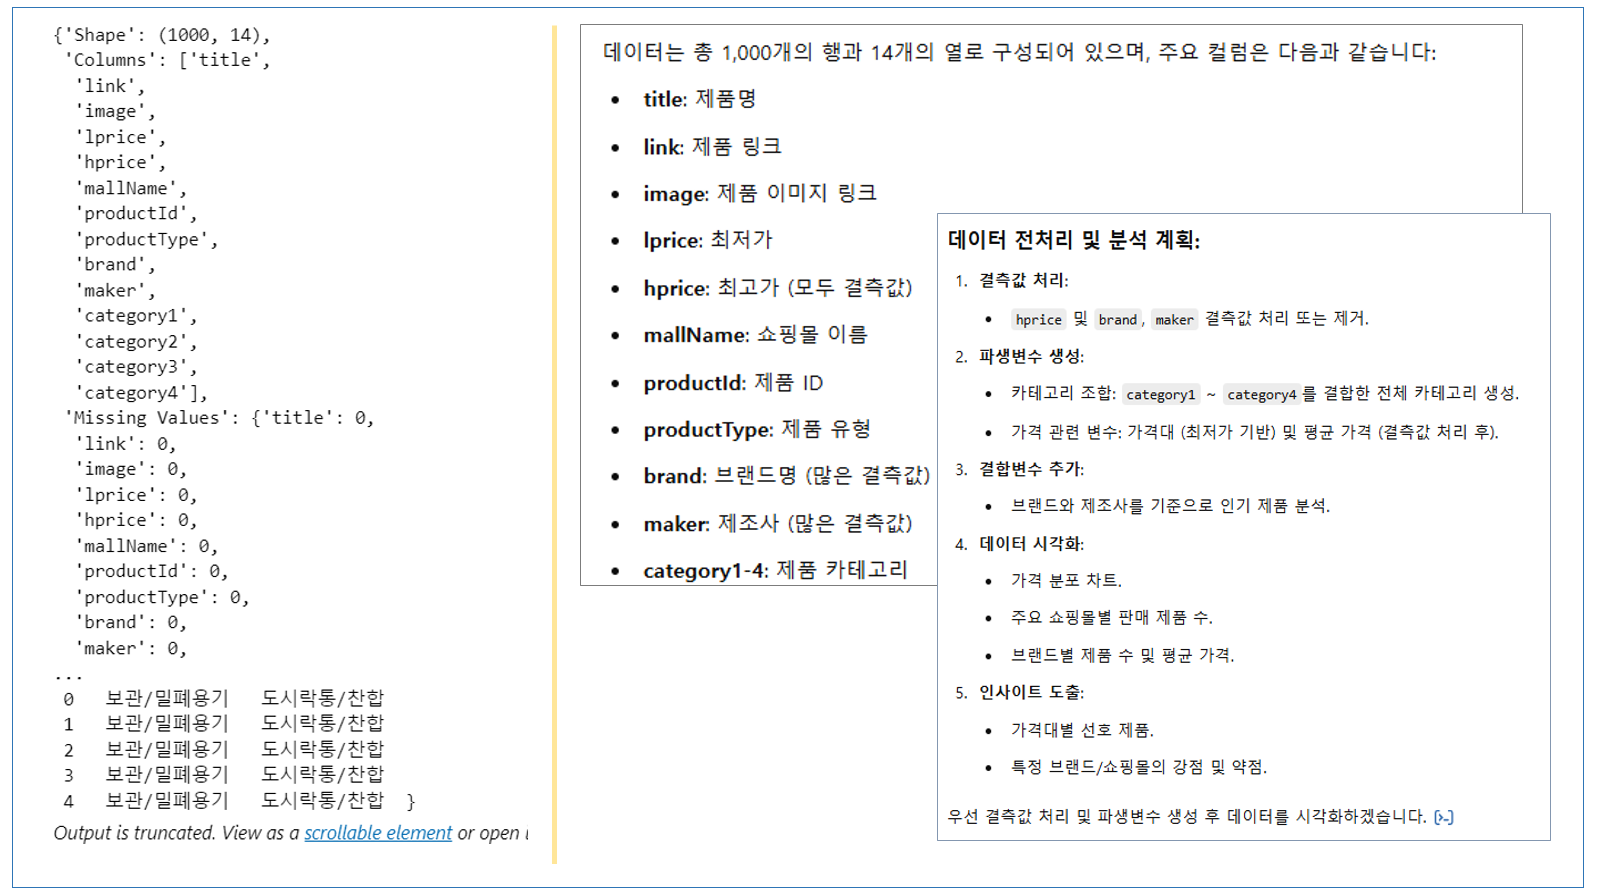

In [12]:
df.head(1)

,title,link,image,lprice,hprice,mallName,productId,productType,brand,maker,category1,category2,category3,category4
0,바오니 가열 보온 도시락 <b>직장인</b> 밀프랩 스텐 도시락통,https://smartstore.naver.com/main/products/775...,https://shopping-phinf.pstatic.net/main_852971...,35800,,VAONI,85297165150,2,,,생활/건강,주방용품,보관/밀폐용기,도시락통/찬합


{'Shape': (1000, 14),
 'Columns': ['title',
  'link',
  'image',
  'lprice',
  'hprice',
  'mallName',
  'productId',
  'productType',
  'brand',
  'maker',
  'category1',
  'category2',
  'category3',
  'category4'],
 'Missing Values': {'title': 0,
  'link': 0,
  'image': 0,
  'lprice': 0,
  'hprice': 0,
  'mallName': 0,
  'productId': 0,
  'productType': 0,
  'brand': 0,
  'maker': 0,
  'category1': 0,
  'category2': 0,
  'category3': 0,
  'category4': 0},
 'Sample Data':                                                title  \
 0               바오니 가열 보온 도시락 <b>직장인</b> 밀프랩 스텐 도시락통   
 1  다소다 도시락통 <b>직장인</b> 스텐도시락 샐러드 전자레인지 보온용기 소풍 수능...   
 2  락앤락 스텐 보온 도시락통 세트 7P 수능 도시락 수험생 보온보냉 죽통 <b>직장인...   
 3  다소다 베어 스텐 도시락통 어린이 유치원 소풍 초등 <b>직장인</b> 밀프랩 용기...   
 4  락앤락 도시락통 <b>직장인</b> 도시락 세트 소풍 초등학생 2단 가방 젓가락 데...   
 
                                                 link  \
 0  https://smartstore.naver.com/main/products/775...   
 1  https://smartstore.naver.com/main/products/604...   
 2  htt